In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from scipy.integrate import quad

import functions as fcts

import sys, os, time, fileinput

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('default') 

In [2]:
x_data, y_data = np.load('data/skymap/sample_skymap_upper.npy', allow_pickle=True)
x_data_wps, y_data_wps = np.load('data/skymap/sample_skymap_upper_wps_2.npy', allow_pickle=True)
xloc_list, yloc_list = np.load('data/skymap/sample_skymap_upper_wps_2_locs.npy', allow_pickle=True)

In [3]:
step_size = 0.005
arr_bx_plot = np.arange(-0.2,1.2+step_size,step_size, dtype = float)
arr_by_plot = np.arange(-0.2,1.2+step_size,step_size, dtype = float)
arr_bx = 0.5 * (arr_bx_plot[:-1] + arr_bx_plot[1:])
arr_by = 0.5 * (arr_by_plot[:-1] + arr_by_plot[1:])
Nx = len(arr_bx)
Ny = len(arr_by)


log_arr_a_edge = np.linspace(-3,1,1000+1)
arr_a_edge = 10**log_arr_a_edge
arr_a = 0.5 * (arr_a_edge[:-1] + arr_a_edge[1:])
Na = len(arr_a)
arr_a = arr_a.astype(np.float32)

In [4]:
cwt_map = np.load('cwt_map_2.npy', allow_pickle = True)

degree = 0.6
scale = degree / 15  / 2
na = np.where(arr_a > scale)[0][0]
# na = np.where(arr_a_rev < 0.005)[0][0]

print(scale)

0.02


Text(0, 0.5, '$\\tilde{\\theta}$')

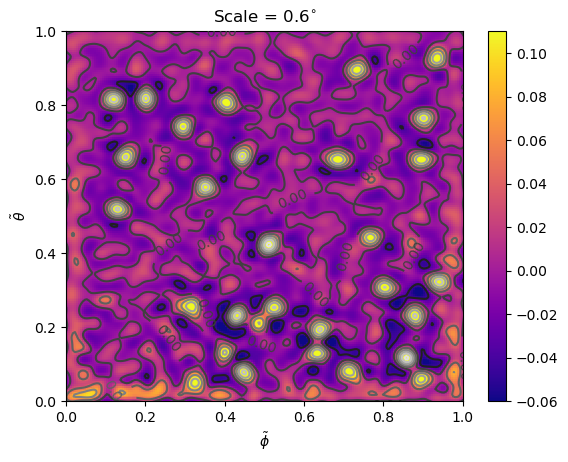

In [5]:
cwt_map_wps = np.load('cwt_map_wps_2.npy', allow_pickle = True)

plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_map_wps[:,:,na].T, cmap='plasma', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=-0.06, vmax=0.11))
# contour needs the centers
cset = plt.contour(arr_bx, arr_by, cwt_map_wps[:,:,na].T, cmap='gray')
plt.clabel(cset, inline=True)

plt.colorbar(plot)
plt.title('Scale = ' + str(degree) + '$^{\circ}$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

In [6]:
# define mesh grid
mesh_bx, mesh_by = np.meshgrid(arr_bx,arr_by) # each output array (NxN shaped) contains x or y value at given (i,j)-th position
mesh_bxby = np.stack((mesh_bx, mesh_by), axis=-1)

def closest_grid_point_(point, grid_points):
    relative_positions = grid_points - point
    distances = np.linalg.norm(relative_positions, axis = -1)
    bxby_index_shape = distances.shape
    flattened_index = np.argmin(distances)
    return np.unravel_index(flattened_index, bxby_index_shape)

In [7]:
loc_list = np.vstack((xloc_list, yloc_list)).T
buf_loc_list = loc_list[np.newaxis, np.newaxis]

In [8]:
point = loc_list[5]
buf_point = point[np.newaxis, np.newaxis]
print(point)

[0.50972059 0.42435891]


In [9]:
index = closest_grid_point_(point, mesh_bxby)
nx = index[0]
ny = index[1]
print(index)

(124, 141)


In [10]:
mesh_bxby[index]

array([0.5075, 0.4225])

In [11]:
psf_scale = 0.4 / 30 

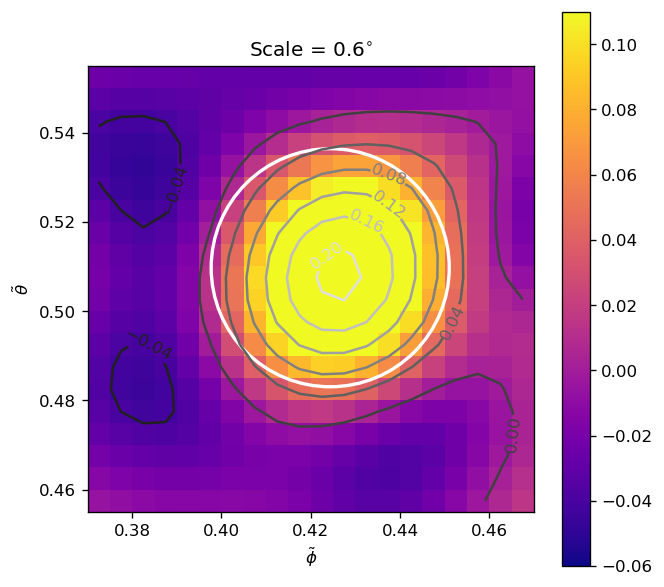

In [12]:
# plot colormesh around the point source
nx_low = nx-10
nx_high = nx+10
ny_low = ny-10
ny_high = ny+10

arr_bx_plot_ps = arr_bx_plot[nx_low:nx_high+1]
arr_by_plot_ps = arr_by_plot[ny_low:ny_high+1]
arr_bx_ps = arr_bx[nx_low:nx_high]
arr_by_ps = arr_bx[ny_low:ny_high]

cwt_map_wps_ps = cwt_map_wps[ny_low:ny_high,nx_low:nx_high,:]

fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plot = ax.pcolormesh(arr_bx_plot_ps, arr_by_plot_ps, cwt_map_wps_ps[:,:,na].T, cmap='plasma', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=-0.06, vmax=0.11))
# contour needs the centers
cset = ax.contour(arr_bx_ps, arr_by_ps, cwt_map_wps_ps[:,:,na].T, cmap='gray')
ax.clabel(cset, inline=True)

plt.colorbar(plot)
plt.title('Scale = ' + str(degree) + '$^{\circ}$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

Drawing_colored_circle = plt.Circle(( point[1] , point[0] ), 2*psf_scale, ec = 'white', fc = 'None', lw = 2)
ax.add_artist( Drawing_colored_circle )

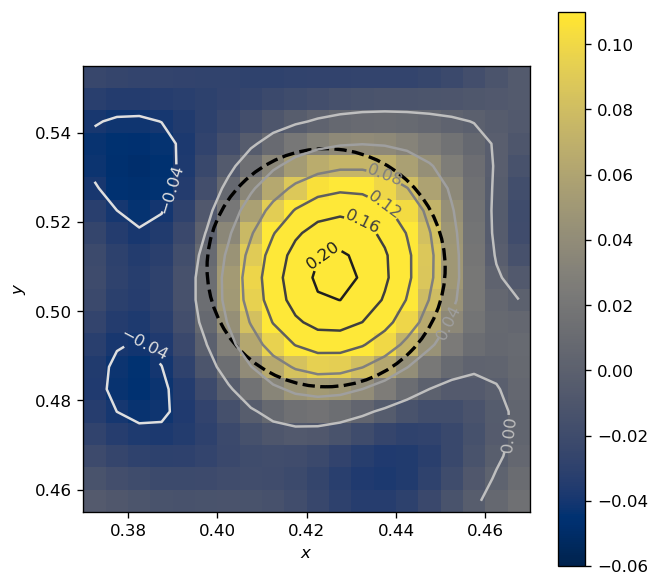

In [26]:
# plot colormesh around the point source
nx_low = nx-10
nx_high = nx+10
ny_low = ny-10
ny_high = ny+10

arr_bx_plot_ps = arr_bx_plot[nx_low:nx_high+1]
arr_by_plot_ps = arr_by_plot[ny_low:ny_high+1]
arr_bx_ps = arr_bx[nx_low:nx_high]
arr_by_ps = arr_bx[ny_low:ny_high]

cwt_map_wps_ps = cwt_map_wps[ny_low:ny_high,nx_low:nx_high,:]

fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plot = ax.pcolormesh(arr_bx_plot_ps, arr_by_plot_ps, cwt_map_wps_ps[:,:,na].T, cmap='cividis', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=-0.06, vmax=0.11))
# contour needs the centers
cset = ax.contour(arr_bx_ps, arr_by_ps, cwt_map_wps_ps[:,:,na].T, cmap='gray_r')
ax.clabel(cset, inline=True)

plt.colorbar(plot)
# plt.title('Scale = ' + str(degree) + '$^{\circ}$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('$x$')
plt.ylabel('$y$')

Drawing_colored_circle = plt.Circle(( point[1] , point[0] ), 2*psf_scale, ec = 'black', fc = 'None', lw = 2, ls = '--')
ax.add_artist( Drawing_colored_circle )

In [27]:
relative_positions = buf_point - mesh_bxby
distances = np.linalg.norm(relative_positions, axis = -1)

(0.0, 0.25)

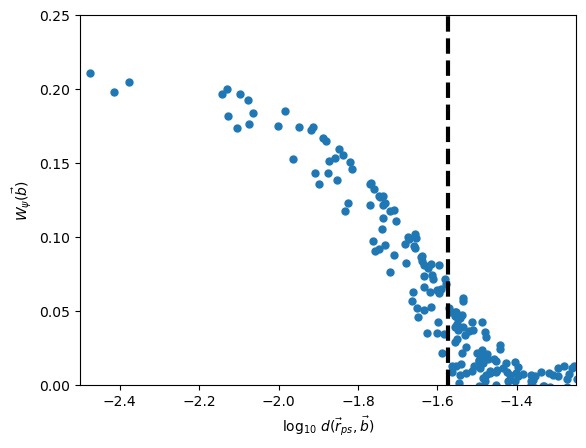

In [45]:
plt.scatter(np.log10(distances), cwt_map_wps[:,:,na].T, s = 25)
plt.axvline(x = np.log10(2 *psf_scale), c = 'k', ls = '--', lw = 3)
plt.xlabel('$\\log_{10} \ d(\\vec{r}_{ps}, \\vec{b})$')
plt.ylabel('$W_{\psi}(\\vec{b})$')
plt.xlim([-2.5,-1.25])
plt.ylim([0,0.25])

In [110]:
print(cwt_map_wps.shape)

(280, 280, 1000)


In [111]:
# define a circle around a grid point
## many pieces of code https://stackoverflow.com/questions/67871432/draw-ring-in-a-grid-centered-on-a-vertex
## midpoint circle drawing algorithm

# however, we will take a potentially more inefficient approach where we just use np.where

# choice: since we will not know the point source's position, we draw circles around the closest grid point
closest_point = mesh_bxby[index]
buf_closest_point = closest_point[np.newaxis, np.newaxis]
relative_positions = buf_closest_point - mesh_bxby
distances = np.linalg.norm(relative_positions, axis = -1)
indices = np.where(distances < 2 * psf_scale)
kx = indices[0]
ky = indices[1]

In [112]:
print(distances[indices].shape)
print(cwt_map_wps[kx,ky,na].T.shape)

(89,)
(89,)


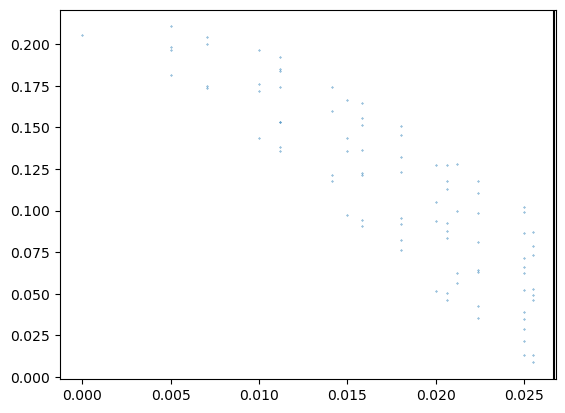

In [113]:
plt.scatter(distances[indices], cwt_map_wps[ky,kx,na].T, s = 0.1)
plt.axvline(x = 2 *psf_scale, c = 'k')

In [114]:
# plot colormesh around the point source

arr_bx_plot_ps = arr_bx_plot[kx]
arr_by_plot_ps = arr_by_plot[ky]
arr_bx_ps = arr_bx[kx]
arr_by_ps = arr_bx[ky]

cwt_map_near = np.zeros()
cwt_map_wps_ps = cwt_map_wps[ky,kx,:]
print(cwt_map_wps_ps.shape)

plot = plt.pcolormesh(arr_bx_plot_ps, arr_by_plot_ps, cwt_map_wps_ps[:,:,na].T, cmap='plasma', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=-0.06, vmax=0.11))
# contour needs the centers
cset = plt.contour(arr_bx_ps, arr_by_ps, cwt_map_wps_ps[:,:,na].T, cmap='gray')
plt.clabel(cset, inline=True)

plt.colorbar(plot)
plt.title('Scale = ' + str(degree) + '$^{\circ}$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

TypeError: zeros() missing required argument 'shape' (pos 1)

In [64]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [65]:
indices_x = [0,1]
indices_y = [1,2]

In [66]:
A[indices_x, indices_y]

array([2, 6])